- apply polynomial regression by taking two input features/predictors
- headbrain.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
data = pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [6]:
data.shape

(237, 4)

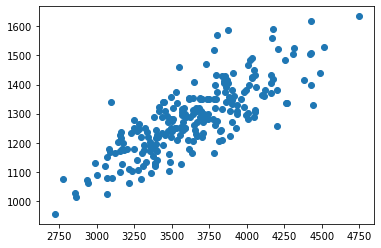

In [7]:
plt.scatter(data["Head Size(cm^3)"],data["Brain Weight(grams)"])
plt.show()

In [8]:
x = data[["Head Size(cm^3)"]]
y = data["Brain Weight(grams)"]

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [13]:
y_pred = model.predict(x_poly)
y_pred

array([1506.69195659, 1313.27584746, 1439.53128175, 1322.6935154 ,
       1418.57723124, 1275.40778514, 1324.61701991, 1268.77977366,
       1282.47423718, 1371.54441754, 1238.3013622 , 1374.1626952 ,
       1289.2237416 , 1426.24448246, 1335.87160166, 1346.3548567 ,
       1252.68760851, 1244.47407188, 1134.31687367, 1482.20606702,
       1346.83054696, 1386.81591821, 1329.17554925, 1306.46640913,
       1578.75638494, 1481.93431378, 1384.42264223, 1381.07709705,
       1241.26216431, 1418.08495051, 1325.0974985 , 1327.25777127,
       1400.52918083, 1414.64657873, 1413.91146886, 1331.56973445,
       1260.52719456, 1315.69755057, 1208.02692948, 1251.37079776,
       1366.78843145, 1254.78833053, 1453.33698327, 1329.17554925,
       1343.26140843, 1383.94436043, 1451.53056356, 1157.09990147,
       1289.47257812, 1290.21861411, 1349.92132427, 1326.53801567,
       1441.81227232, 1390.8922434 , 1378.69064577, 1242.33487172,
       1349.68363883, 1415.87306607, 1360.37369872, 1296.40889

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score:",r2_score(y,y_pred))
print("RMSE :",(mean_squared_error(y,y_pred)))

r2_score: 0.6430704841260575
RMSE : 5147.179949312465


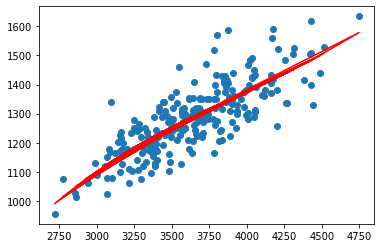

In [15]:
plt.scatter(data["Head Size(cm^3)"],data["Brain Weight(grams)"])
plt.plot(x,y_pred,c = "r")
plt.show()

In [16]:
acc = []
for i in range(2,15):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly,y)
    y_pred = model.predict(x_poly)
    acc.append(r2_score(y,y_pred))
acc

[0.6416304461195703,
 0.6430704841260575,
 0.643511175321807,
 0.6437052787947153,
 0.6438594313982895,
 0.6439528406059442,
 0.6439714184735092,
 0.6439060759016915,
 0.6437475933365395,
 0.6434804940376057,
 0.6430781862222363,
 0.6425008175491725,
 0.6416961634450089]

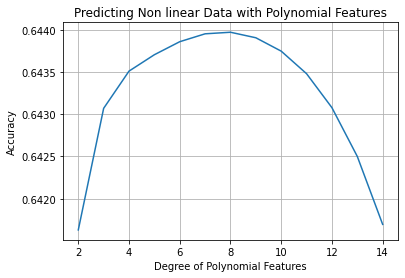

In [17]:
plt.plot(np.arange(2,15),acc)
plt.xlabel("Degree of Polynomial Features")
plt.ylabel("Accuracy")
plt.grid()
plt.title("Predicting Non linear Data with Polynomial Features")
plt.show()